# ANNUR AFGONI

# G1B017006

### Projectile Motion

Gerak Parabola merupakan perpaduan antara gerak lurus beraturan dan gerak lurus berubah beraturan. Dimana gerak lurus beraturan terjadi pada sumbu x karena percepatannya adalah 0, dan gerak lurus berubah beraturan terjadi pada sumbu y dimana percepatannya adalah sama dengan gravitasi.

Persamaan gerak pada sumbu x adalah :

$$v_{x}=v_{0x}=v_{0}\cos \theta$$

$$x = v_{0x}t=x_{0}+v_{0}\cos (\theta) t$$

$$\frac{d^{2}x}{dt^{2}}=a_{x}=0$$

Persamaan gerak pada sumbu y adalah :

$$v_{0y}=v_{0}\sin \theta$$ 

$$v_{y}=v_{0}\sin \theta -gt$$

$$y=y_{0} + v_{0}\sin(\theta) t-\frac{1}{2}gt$$

$$\frac{d^{2}y}{dt^{2}}=a_{y}=-g$$

In [2]:
%matplotlib inline

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [4]:
# Inisialisasi Parameter

dt = 0.025

x_0 = 0.0
y_0 = 0.0
v_0 = 10.0
theta = 30.0 #dalam satuan derajat
vx_0 = v_0*math.cos(theta*math.pi/180)
vy_0 = v_0*math.sin(theta*math.pi/180)

g = 9.81

In [5]:
# Mencari nilai eksak dengan Rumus GLBB percepatan konstan
xe = [x_0]
vxe = [vx_0]
ye = [y_0]  
vye = [vy_0]

ay_n = -g
tn = 0.0

for i in range (40):
    tn = tn + dt
    
    #Persamaan Gerak
    x_n = x_0 +vx_0*tn
    vx_n = vx_0
    
    y_n = y_0 + vy_0*tn + 0.5*ay_n*tn**2
    vy_n = vy_0 + ay_n*tn
    
    #simpan pada List
    vxe.append(vx_n)
    xe.append(x_n)
    vye.append(vy_n)
    ye.append(y_n)

**Metode Verlet Versi Posisi**

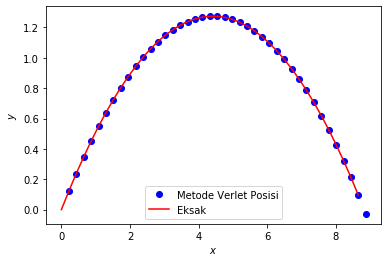

In [7]:
# Iterasi metode verlet versi posisi
'''
Notasi:
    x_n untuk posisi pada indeks n
    x_new untuk posisi pada indeks n+1 
    x_old untuk posisi pada indeks n-1 
'''

#nilai awal
ax_0 = 0.0
x_1 = x_0 + vx_0*dt + 0.5*ax_0*dt**2

ay_0 = -g
y_1 = y_0 + vy_0*dt + 0.5*ay_0*dt**2

ax_n = 0.0
ay_n = -g

x_old = x_0
x_n = x_1

y_old = y_0
y_n = y_1

# Array tempat menyimpan nilai
x = [x_n]
y = [y_n]

for i in range (40):
    
    # Update percepatan
    ax_n = 0.0
    ay_n = -g
    
    # Metode Verlet versi posisi
    x_new = 2*x_n - x_old + ax_n*dt**2
    y_new = 2*y_n - y_old + ay_n*dt**2
    
    #Simpan untuk iterasi selanjutnya
    x_old = x_n
    x_n = x_new
    
    y_old = y_n
    y_n = y_new
    
    # Simpan hasil pada List
    x.append(x_n)
    y.append(y_n)
    
#Visualisasi
plt.plot(x,y,'ob', label = 'Metode Verlet Posisi')
plt.plot(xe,ye,'-r', label = 'Eksak')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.show()

**Metode Verlet Versi Kecepatan**

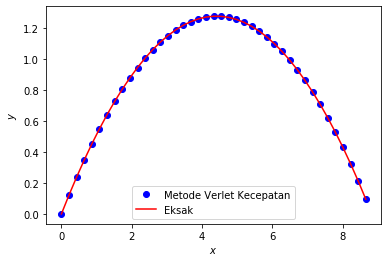

In [29]:
# Iterasi metode verlet kecepatan
'''
Notasi:
        x_n untuk posisi pada indeks ke n
        x_new untuk posisi pada indeks ke n+1 
'''
#Nilai awal 
x_n = x_0
vx_n = vx_0

y_n = y_0
vy_n = vy_0

x = [x_0]
vx = [vx_0]
y = [y_0]
vy = [vy_0]

for i in range (40):
    
    vx_new = vx_n + 0.5*ax_n*dt
    x_new = x_n + vx_n*dt + 0.5*ax_n*dt**2
    
    vy_new = vy_n + 0.5*ay_n*dt
    y_new = y_n + vy_n*dt + 0.5*ay_n*dt**2    
    
    ax_n = 0.0
    ay_n = -g
          
    vx_new = vx_new + 0.5*ax_n*dt
    vy_new = vy_new + 0.5*ay_n*dt
    
    x_n = x_new
    y_n = y_new
    vx_n = vx_new
    vy_n = vy_new
    
    x.append(x_n)
    y.append(y_n)
    
#Visualisasi
plt.plot(x,y,'ob', label = 'Metode Verlet Kecepatan')
plt.plot(xe,ye,'-r', label = 'Eksak')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.show()

**Metode Leap Frog**

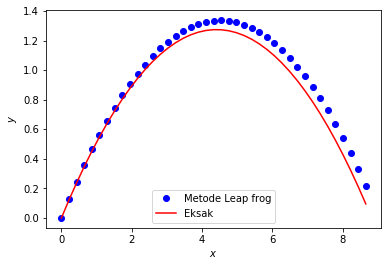

In [33]:
# Iterasi metode leapfrog
'''
Notasi:
    x_n untuk posisi pada indeks n
    x_new untuk posisi pada indeks n+1
    vxs untuk posisi pada indeks n+1/2
'''

ax_0 = 0.0
vxs0 = vx_0 + 0.5*ax_0*dt

ay_0 = -g
vys0 = vy_0 + 0.5*ax_0*dt

#array
x = [x_0]
vx = [vxs0]
y = [y_0]
vy = [vys0]

x_n = x_0
vx_n = vxs0
y_n = y_0
vy_n = vys0

for i in range (40):
    ax_n = 0.0
    ay_n = -g
    
    x_new = x_n + vx_n*dt
    vx_new = vx_n + ax_n*dt
    
    y_new = y_n + vy_n*dt
    vy_new = vy_n + ay_n*dt
    
    x_n = x_new 
    vx_n = vx_new
    y_n = y_new
    vy_n = vy_new
    
    x.append(x_n)
    y.append(y_n)
    
#Visualisasi
plt.plot(x,y,'ob', label = 'Metode Leap frog')
plt.plot(xe,ye,'-r', label = 'Eksak')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.show()